In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image

# Load MNIST dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()

# Load CIFAR-10 dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = datasets.cifar10.load_data()

/Users/zara/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Preprocess MNIST data
mnist_train_images = mnist_train_images[..., tf.newaxis].repeat(3, axis=-1) / 255.0  # Convert to 3 channels
mnist_train_images = tf.image.resize(mnist_train_images, (32, 32))  # Resize to 32x32
mnist_test_images = mnist_test_images[..., tf.newaxis].repeat(3, axis=-1) / 255.0
mnist_test_images = tf.image.resize(mnist_test_images, (32, 32))
mnist_train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)
mnist_test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

# Preprocess CIFAR-10 data
cifar_train_images = cifar_train_images / 255.0
cifar_test_images = cifar_test_images / 255.0
cifar_train_labels = tf.keras.utils.to_categorical(cifar_train_labels, 10)
cifar_test_labels = tf.keras.utils.to_categorical(cifar_test_labels, 10)

In [3]:
# Combine datasets
combined_train_images = np.concatenate((mnist_train_images, cifar_train_images))
combined_train_labels = np.concatenate((mnist_train_labels, cifar_train_labels))
combined_test_images = np.concatenate((mnist_test_images, cifar_test_images))
combined_test_labels = np.concatenate((mnist_test_labels, cifar_test_labels))

In [ ]:
# Define a CNN model
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Combined Model
combined_model = create_cnn_model((32, 32, 3))
combined_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


# Train Combined model
print("Training Combined Model...")
combined_history = combined_model.fit(combined_train_images, combined_train_labels,
                                      epochs=10,
                                      validation_data=(combined_test_images, combined_test_labels))

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define a linear neural network model
def create_linear_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the linear model
linear_model = create_linear_model((32, 32, 3))
linear_model.compile(optimizer=Adam(),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


history_linear = linear_model.fit(combined_train_images, combined_train_labels,
                                      epochs=10,
                                      validation_data=(combined_test_images, combined_test_labels))

In [ ]:
def create_shallow_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

shallow_cnn = create_shallow_cnn((32, 32, 3), 10)
shallow_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_shallow = shallow_cnn.fit(combined_train_images, combined_train_labels, epochs=10,
                                  validation_data=(combined_test_images, combined_test_labels))


/Users/zara/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def create_fully_connected_nn(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

fcnn = create_fully_connected_nn((32, 32, 3), 10)
fcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_fcnn = fcnn.fit(combined_train_images, combined_train_labels, epochs=10,
                        validation_data=(combined_test_images, combined_test_labels))


In [ ]:
from tensorflow.keras import models, layers

def create_diluted_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(16, (5, 5), activation='relu', strides=2, input_shape=input_shape),  # Larger stride, fewer filters
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (5, 5), activation='relu', strides=2),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')  # No intermediate dense layers
    ])
    return model

# Initialize the model
diluted_cnn = create_diluted_cnn((32, 32, 3), 10)
diluted_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_diluted_cnn = diluted_cnn.fit(combined_train_images, combined_train_labels, epochs=10,
                                      validation_data=(combined_test_images, combined_test_labels))

In [ ]:
from tensorflow.keras import models, layers

# Define LSTM model
def create_lstm_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Reshape((input_shape[0], input_shape[1] * input_shape[2]), input_shape=input_shape),
        layers.LSTM(64, activation='tanh', return_sequences=True),
        layers.LSTM(64, activation='tanh'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

lstm_model = create_lstm_model((32, 32, 3), 10)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = lstm_model.fit(combined_train_images, combined_train_labels, epochs=10,
                              validation_data=(combined_test_images, combined_test_labels))

In [ ]:
def create_mlp(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

mlp_model = create_mlp((32, 32, 3), 10)
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP model
history_mlp = mlp_model.fit(combined_train_images, combined_train_labels, epochs=10,
                            validation_data=(combined_test_images, combined_test_labels))

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, MultiHeadAttention, LayerNormalization
from tensorflow.keras.models import Model

def create_simple_transformer(input_shape, patch_size, num_classes):
    # Calculate the number of patches
    num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)
    patch_dim = patch_size * patch_size * input_shape[2]

    inputs = Input(shape=input_shape)

    # Convert image into patches
    x = Reshape((num_patches, patch_dim))(inputs)

    # Add a Multi-Head Attention Layer
    x = MultiHeadAttention(num_heads=2, key_dim=patch_dim)(x, x)
    x = LayerNormalization()(x)

    # Flatten and classify
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

# Initialize the model
simplified_transformer = create_simple_transformer((32, 32, 3), patch_size=4, num_classes=10)
simplified_transformer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_simplified_transformer = simplified_transformer.fit(combined_train_images, combined_train_labels, epochs=10,
                                                            validation_data=(combined_test_images, combined_test_labels))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


models_history = {
    "Our CNN": combined_history,
    "Shallow CNN": history_shallow,
    "Diluted CNN": history_diluted_cnn,
    "Linear NN": history_linear,
    "FCNN": history_fcnn,
    "MLP": history_mlp,
    "LSTM": history_lstm,
    "Transformer": history_simplified_transformer,
}


# Example: Generate predictions for validation data for each model
cnn_val_pred = combined_model.predict(combined_test_images)
shallow_val_pred = shallow_cnn.predict(combined_test_images)
diluted_val_pred = diluted_cnn.predict(combined_test_images)
linear_val_pred = linear_model.predict(combined_test_images)
fcnn_val_pred = fcnn.predict(combined_test_images)
mlp_val_pred = mlp_model.predict(combined_test_images)
lstm_val_pred = lstm_model.predict(combined_test_images)
transformer_val_pred = simplified_transformer.predict(combined_test_images)

# Replace with actual validation predictions and true labels
models_predictions = {
    "Our CNN": (cnn_val_pred, combined_test_labels),
    "Shallow CNN": (shallow_val_pred, combined_test_labels),
    "Diluted CNN": (diluted_val_pred, combined_test_labels),
    "Linear NN": (linear_val_pred, combined_test_labels),
    "FCNN": (fcnn_val_pred, combined_test_labels),
    "MLP": (mlp_val_pred, combined_test_labels),
    "LSTM": (lstm_val_pred, combined_test_labels),
    "Transformer": (transformer_val_pred, combined_test_labels),
}

group1_models = ["Our CNN", "Shallow CNN", "Diluted CNN"]
group2_models = ["Linear NN", "FCNN", "MLP", "LSTM", "Transformer"]

In [ ]:
import random
import string

# Function to generate a random string of length 10
def generate_random_string(length=10):
    return ''.join(random.choices(string.ascii_letters, k=length))



'uaJWZgXOLC'

Testing CIFAR-10 Images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


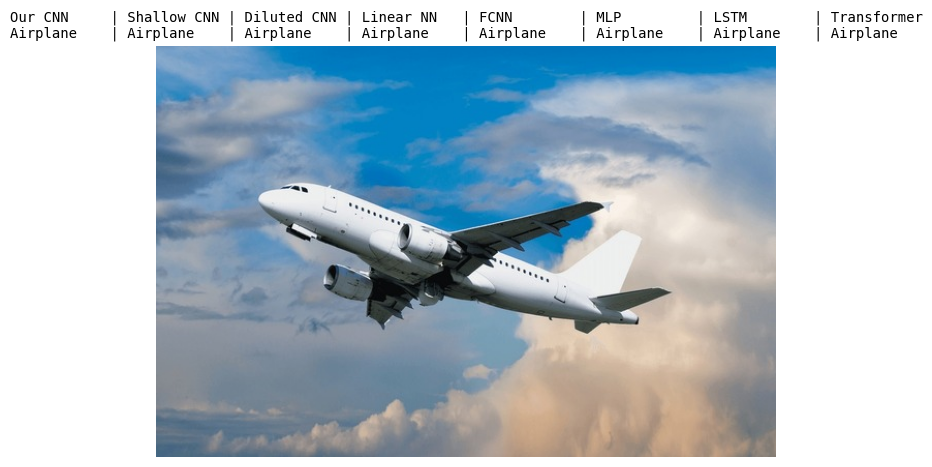

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


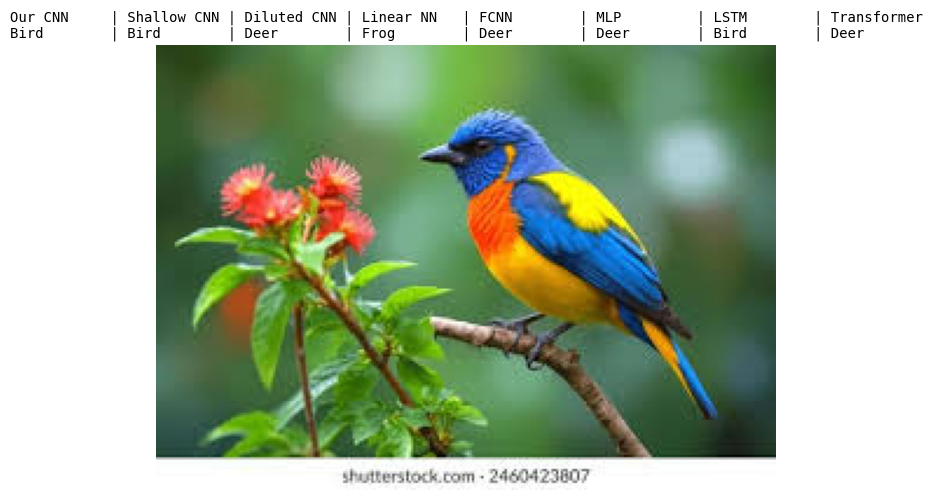

Testing MNIST Images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


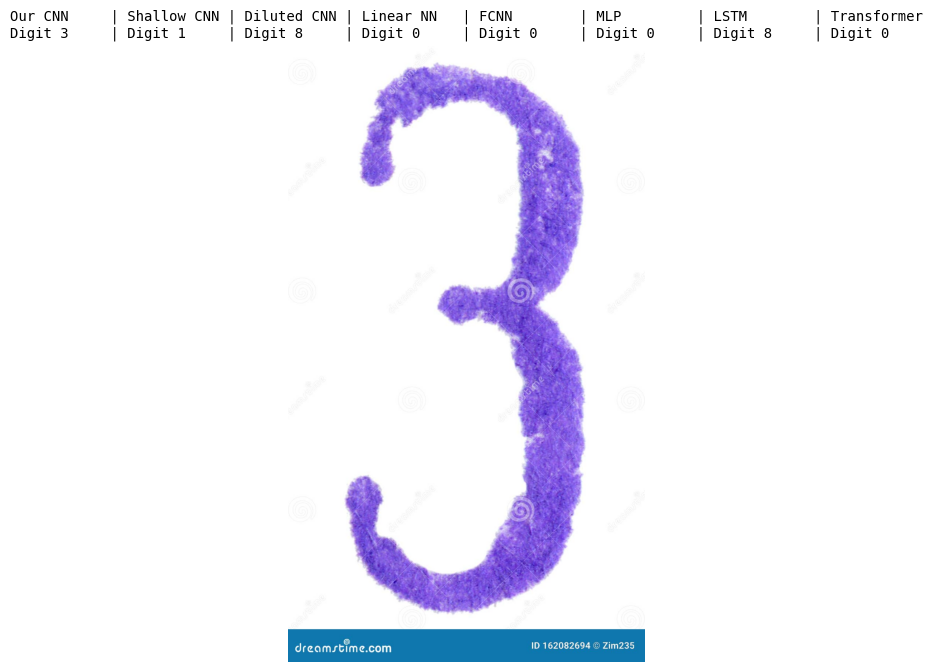

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


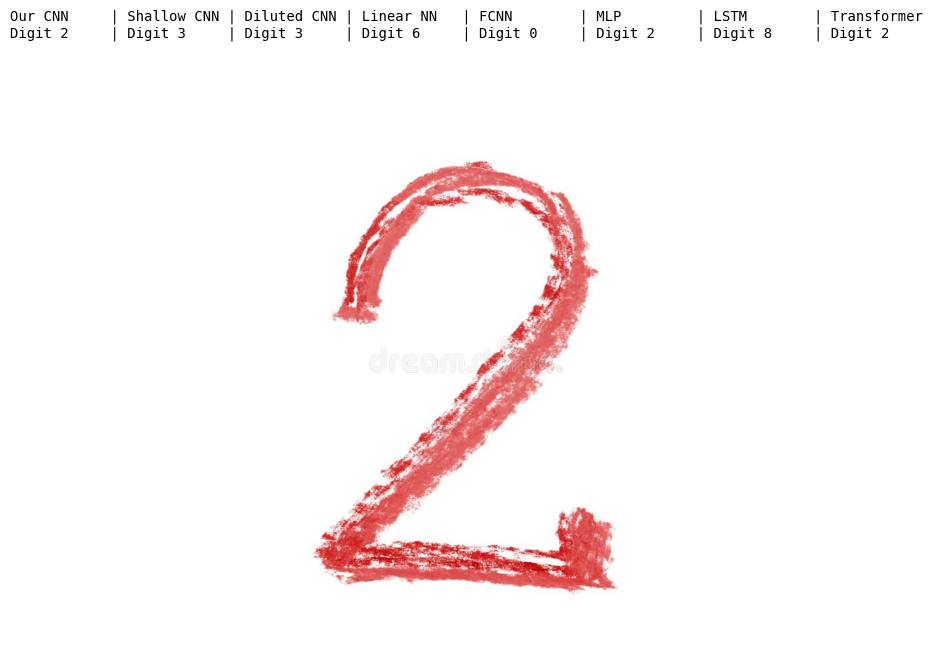

In [146]:
# Function to download, preprocess, and predict
def download_and_test_image_all_models(url, label_map, models):
    # Download and preprocess the image
    response = requests.get(url, stream=True)
    img = Image.open(response.raw).convert('RGB')
    img2 = img.copy()
    img = img.resize((32, 32))
    img_array = np.array(img) / 255.0

    # Generate predictions for each model
    predictions = {name: model.predict(img_array[np.newaxis, ...]) for name, model in models.items()}

    # Get the predicted class for each model
    predicted_classes = {name: label_map[np.argmax(pred)] for name, pred in predictions.items()}

    max_name_length = max(len(name) for name in predicted_classes.keys())
    model_names = list(predicted_classes.keys())
    row1 = " | ".join([f"{name}" for name in model_names])
    row2 = " | ".join([f"{predicted_classes[name]}" for name in model_names])
    row1 = " | ".join([f"{name:<{max_name_length}}" for name in predicted_classes.keys()])
    row2 = " | ".join([f"{predicted_classes[name]:<{max_name_length}}" for name in predicted_classes.keys()])
    # Plot the image and predictions
    max_name_length = max(len(name) for name in predicted_classes.keys())

    # Prepare padded rows for model names and predictions
    row1 = " | ".join([f"{name:<{max_name_length}}" for name in predicted_classes.keys()])
    row2 = " | ".join([f"{predicted_classes[name]:<{max_name_length}}" for name in predicted_classes.keys()])

    # Plot the original image and the predictions
    plt.figure(figsize=(8, 8))
    plt.imshow(img2)
    title = f"{row1}\n{row2}"
    plt.title(title, fontsize=10, family="monospace")
    plt.axis('off')
    plt.savefig( generate_random_string()+'.pdf',format="pdf",bbox_inches="tight", pad_inches=0.5)
    plt.show()

# Label maps for CIFAR-10 and MNIST
label_map_cifar = {
    0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer',
    5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'
}

label_map_mnist = {
    0: 'Digit 0', 1: 'Digit 1', 2: 'Digit 2', 3: 'Digit 3', 4: 'Digit 4',
    5: 'Digit 5', 6: 'Digit 6', 7: 'Digit 7', 8: 'Digit 8', 9: 'Digit 9'
}

# Dictionary of all trained models
models_dict = {
    "Our CNN": combined_model,
    "Shallow CNN": shallow_cnn,
    "Diluted CNN": diluted_cnn,
    "Linear NN": linear_model,
    "FCNN": fcnn,
    "MLP": mlp_model,
    "LSTM": lstm_model,
    "Transformer": simplified_transformer,
}

# CIFAR-10 Test URLs (without Truck example)
cifar_test_urls = [
    "https://www.shutterstock.com/image-photo/airplane-flying-sky-travel-background-600nw-2478264897.jpg",  # Airplane
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSB4ulB6b0okw4EgTg1Gkf0IJ1VdX8H1Hp1YQ&s"  # Bird
]
print("Testing CIFAR-10 Images...")
for url in cifar_test_urls:
    download_and_test_image_all_models(url, label_map_cifar, models_dict)
# MNIST Test URLs
mnist_test_urls = [
    "https://thumbs.dreamstime.com/z/digit-number-printed-blue-ink-stamp-isolated-white-background-digit-number-printed-blue-ink-stamp-162082694.jpg",  # Digit 5
    "https://thumbs.dreamstime.com/b/hand-drawn-colorful-chalks-number-two-symbol-isolated-over-white-background-hand-drawn-number-symbol-isolated-108119204.jpg" # Digits 0-9 (cropped input expected for individual tests)
]

# Test CIFAR-10 Images


# Test MNIST Images
print("Testing MNIST Images...")
for url in mnist_test_urls:
    download_and_test_image_all_models(url, label_map_mnist, models_dict)


In [151]:
import pickle

# Directory for saving files
import os
os.makedirs("saved_models", exist_ok=True)

# Loop through models and histories
for model_name, history in models_history.items():
    # Save the model
    file_name_model = f"saved_models/{model_name.replace(' ', '_').lower()}.keras"
    history.model.save(file_name_model)

    # Save the history
    file_name_history = f"saved_models/{model_name.replace(' ', '_').lower()}_history.pkl"
    with open(file_name_history, 'wb') as f:
        pickle.dump(history.history, f)

    print(f"Saved {model_name} model as {file_name_model}")
    print(f"Saved {model_name} history as {file_name_history}")


Saved Our CNN model as saved_models/our_cnn.keras
Saved Our CNN history as saved_models/our_cnn_history.pkl
Saved Shallow CNN model as saved_models/shallow_cnn.keras
Saved Shallow CNN history as saved_models/shallow_cnn_history.pkl
Saved Diluted CNN model as saved_models/diluted_cnn.keras
Saved Diluted CNN history as saved_models/diluted_cnn_history.pkl
Saved Linear NN model as saved_models/linear_nn.keras
Saved Linear NN history as saved_models/linear_nn_history.pkl
Saved FCNN model as saved_models/fcnn.keras
Saved FCNN history as saved_models/fcnn_history.pkl
Saved MLP model as saved_models/mlp.keras
Saved MLP history as saved_models/mlp_history.pkl
Saved LSTM model as saved_models/lstm.keras
Saved LSTM history as saved_models/lstm_history.pkl
Saved Transformer model as saved_models/transformer.keras
Saved Transformer history as saved_models/transformer_history.pkl


In [ ]:
from tensorflow.keras.models import load_model

# Specify the paths for your saved models
model_paths = {
    "Our CNN": "our_cnn.keras",
    "Shallow CNN": "shallow_cnn.keras",
    "Diluted CNN": "diluted_cnn.keras",
    "Linear NN": "linear_nn.keras",
    "FCNN": "fcnn.keras",
    "MLP": "mlp.keras",
    "LSTM": "lstm.keras",
    "Simplified Transformer": "simplified_transformer.keras",
}

# Load the models into a dictionary
loaded_models = {}
for model_name, path in model_paths.items():
    loaded_models[model_name] = load_model(path)
    print(f"Loaded model: {model_name}")


In [152]:
# Load the saved history
file_name_history = "saved_models/our_cnn_history.pkl"
with open(file_name_history, 'rb') as f:
    loaded_history = pickle.load(f)

print("Loaded History:", loaded_history)


Loaded History: {'accuracy': [0.7296817898750305, 0.8119999766349792, 0.8392090797424316, 0.8569090962409973, 0.8706545233726501, 0.8814272880554199, 0.89042729139328, 0.8975363373756409, 0.9064000248908997, 0.9124000072479248], 'loss': [0.7605909705162048, 0.5359433889389038, 0.45909619331359863, 0.4092768430709839, 0.37089091539382935, 0.33883047103881836, 0.3127741813659668, 0.29211747646331787, 0.2682530879974365, 0.2494545876979828], 'val_accuracy': [0.7791000008583069, 0.8046000003814697, 0.826449990272522, 0.8342499732971191, 0.8377000093460083, 0.8367000222206116, 0.8464499711990356, 0.8417999744415283, 0.8411499857902527, 0.8367000222206116], 'val_loss': [0.6301094889640808, 0.5544297099113464, 0.5043574571609497, 0.4810694456100464, 0.48439085483551025, 0.4834456443786621, 0.46199730038642883, 0.4882214367389679, 0.5159594416618347, 0.5440077185630798]}


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Use the tab20 colormap
palette = cm.get_cmap('tab20')

colors = {
    "Our CNN": (palette(0), palette(1)),  
    "Shallow CNN": (palette(6), palette(7)),
    "Diluted CNN": (palette(4), palette(5)),
    "Linear NN": (palette(6), palette(7)),
    "FCNN": (palette(4), palette(5)),
    "MLP": (palette(2), palette(3)),
    "LSTM": (palette(8), palette(9)),
    "Transformer": (palette(12), palette(13)),
}
markers = {
    "Training": "o",
    "Validation": "s",
}

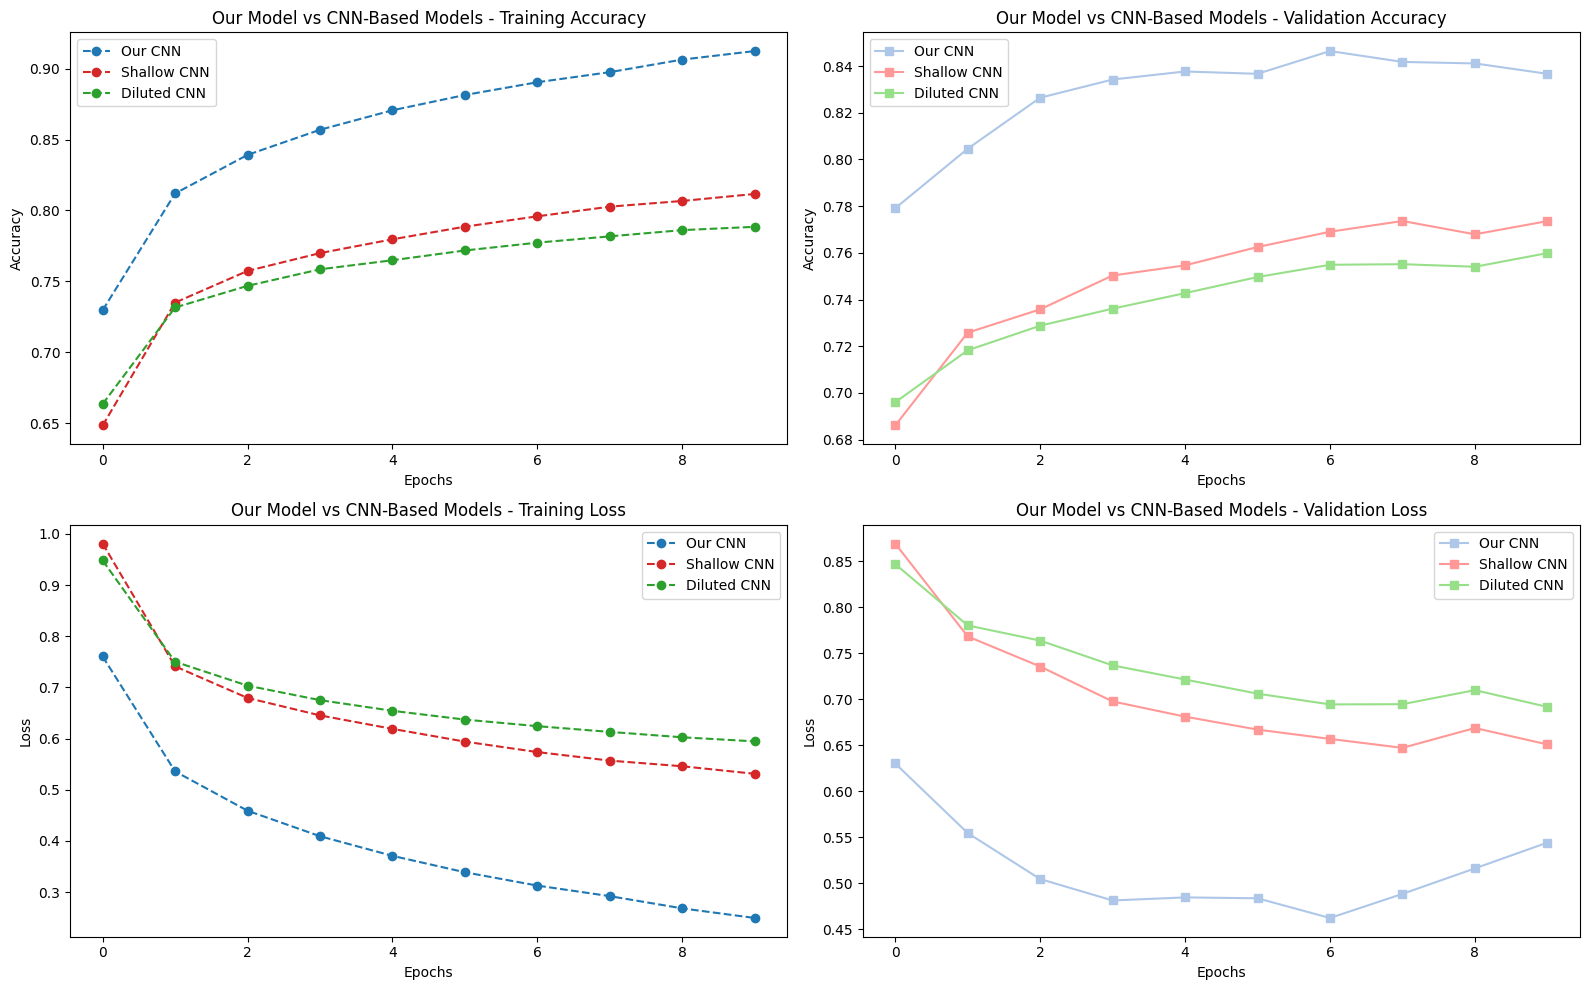

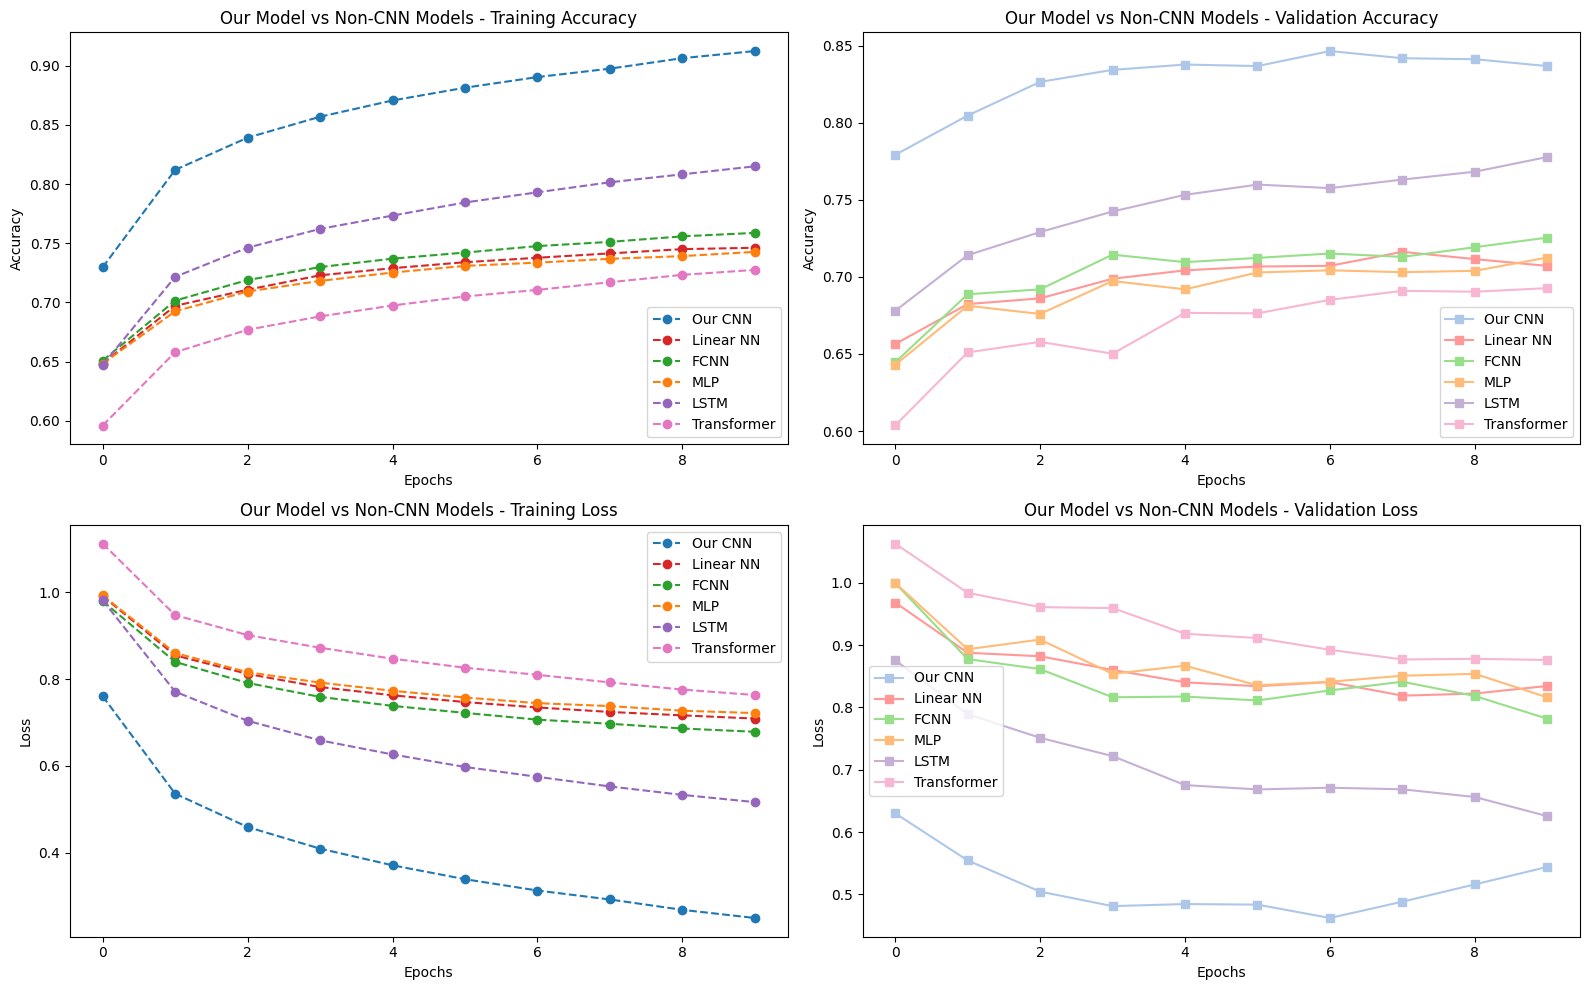

In [57]:
def combined_group_plot_legends_per_plot(models_history, group_models, group_title, base_model="Our CNN"):
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))

    # Row 1: Accuracy
    # Training Accuracy
    axs[0, 0].plot(models_history[base_model].history['accuracy'], 
                   label=f"{base_model}", color=colors[base_model][0], linestyle='--', marker=markers['Training'])
    for model_name in group_models:
        axs[0, 0].plot(models_history[model_name].history['accuracy'], 
                       label=f"{model_name}", color=colors[model_name][0], linestyle='--', marker=markers['Training'])
    axs[0, 0].set_title(f"{group_title} - Training Accuracy")
    axs[0, 0].set_xlabel("Epochs")
    axs[0, 0].set_ylabel("Accuracy")
    axs[0, 0].legend(loc='best')

    # Validation Accuracy
    axs[0, 1].plot(models_history[base_model].history['val_accuracy'], 
                   label=f"{base_model}", color=colors[base_model][1], linestyle='-', marker=markers['Validation'])
    for model_name in group_models:
        axs[0, 1].plot(models_history[model_name].history['val_accuracy'], 
                       label=f"{model_name}", color=colors[model_name][1], linestyle='-', marker=markers['Validation'])
    axs[0, 1].set_title(f"{group_title} - Validation Accuracy")
    axs[0, 1].set_xlabel("Epochs")
    axs[0, 1].set_ylabel("Accuracy")
    axs[0, 1].legend(loc='best')

    # Row 2: Loss
    # Training Loss
    axs[1, 0].plot(models_history[base_model].history['loss'], 
                   label=f"{base_model}", color=colors[base_model][0], linestyle='--', marker=markers['Training'])
    for model_name in group_models:
        axs[1, 0].plot(models_history[model_name].history['loss'], 
                       label=f"{model_name}", color=colors[model_name][0], linestyle='--', marker=markers['Training'])
    axs[1, 0].set_title(f"{group_title} - Training Loss")
    axs[1, 0].set_xlabel("Epochs")
    axs[1, 0].set_ylabel("Loss")
    axs[1, 0].legend(loc='best')

    # Validation Loss
    axs[1, 1].plot(models_history[base_model].history['val_loss'], 
                   label=f"{base_model}", color=colors[base_model][1], linestyle='-', marker=markers['Validation'])
    for model_name in group_models:
        axs[1, 1].plot(models_history[model_name].history['val_loss'], 
                       label=f"{model_name}", color=colors[model_name][1], linestyle='-', marker=markers['Validation'])
    axs[1, 1].set_title(f"{group_title} - Validation Loss")
    axs[1, 1].set_xlabel("Epochs")
    axs[1, 1].set_ylabel("Loss")
    axs[1, 1].legend(loc='best')

    plt.tight_layout()
    plt.savefig(group_title+'.pdf')

    plt.show()

# Group 1: CNN-Based Models
group1_models = ["Shallow CNN", "Diluted CNN"]
combined_group_plot_legends_per_plot(models_history, group1_models, "Our Model vs CNN-Based Models")

# Group 2: Non-CNN and Hybrid Models
group2_models = ["Linear NN", "FCNN", "MLP", "LSTM", "Transformer"]
combined_group_plot_legends_per_plot(models_history, group2_models, "Our Model vs Non-CNN Models")


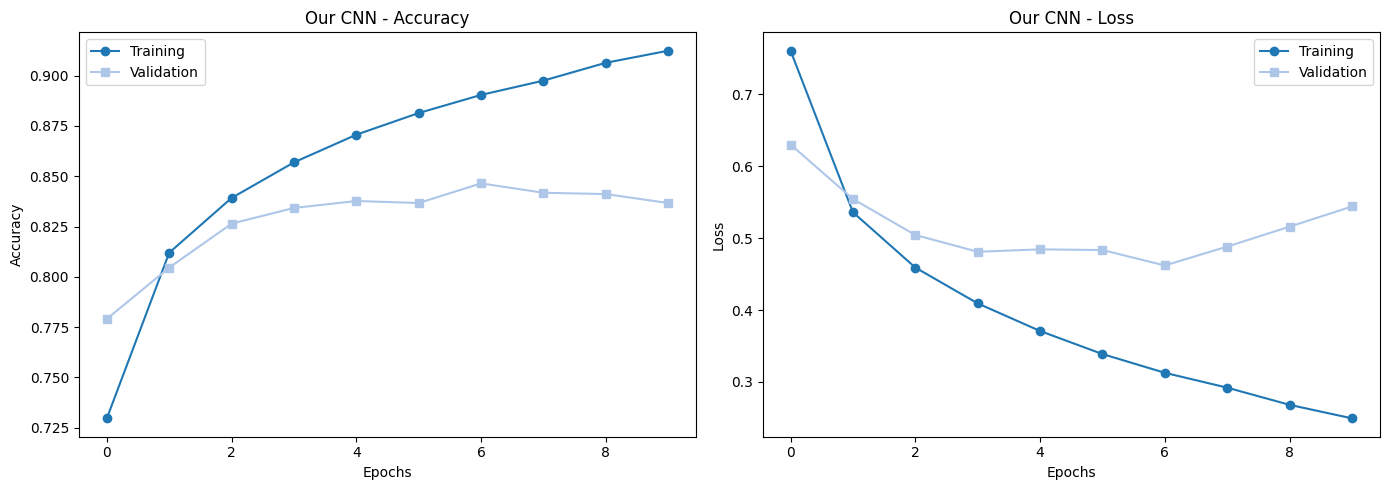

In [50]:
def plot_cnn(history, model_name):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy
    axs[0].plot(history.history['accuracy'], label='Training', color=colors[model_name][0], marker=markers['Training'])
    axs[0].plot(history.history['val_accuracy'], label='Validation', color=colors[model_name][1], marker=markers['Validation'])
    axs[0].set_title(f"{model_name} - Accuracy")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend()

    # Loss
    axs[1].plot(history.history['loss'], label='Training', color=colors[model_name][0], marker=markers['Training'])
    axs[1].plot(history.history['val_loss'], label='Validation', color=colors[model_name][1], marker=markers['Validation'])
    axs[1].set_title(f"{model_name} - Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].legend()

    plt.tight_layout()
    plt.savefig('ourmodel.pdf')
    
    plt.show()

# Plot for Our CNN
plot_cnn(models_history["Our CNN"], "Our CNN")

In [54]:
# Calculate and display F1, precision, recall, and accuracy
for model_name, (predictions, true_labels) in models_predictions.items():
    y_pred = predictions.argmax(axis=1)
    y_true = true_labels.argmax(axis=1)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted')
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")



Model: Our CNN
Accuracy: 0.8367
Precision: 0.8404
Recall: 0.8367
F1 Score: 0.8374

Model: Shallow CNN
Accuracy: 0.7736
Precision: 0.7743
Recall: 0.7736
F1 Score: 0.7731

Model: Diluted CNN
Accuracy: 0.7599
Precision: 0.7687
Recall: 0.7599
F1 Score: 0.7583

Model: Linear NN
Accuracy: 0.7071
Precision: 0.7206
Recall: 0.7071
F1 Score: 0.7082

Model: FCNN
Accuracy: 0.7255
Precision: 0.7289
Recall: 0.7255
F1 Score: 0.7244

Model: MLP
Accuracy: 0.7126
Precision: 0.7169
Recall: 0.7126
F1 Score: 0.7118

Model: LSTM
Accuracy: 0.7778
Precision: 0.7791
Recall: 0.7778
F1 Score: 0.7773

Model: Transformer
Accuracy: 0.6927
Precision: 0.7047
Recall: 0.6927
F1 Score: 0.6915
